### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

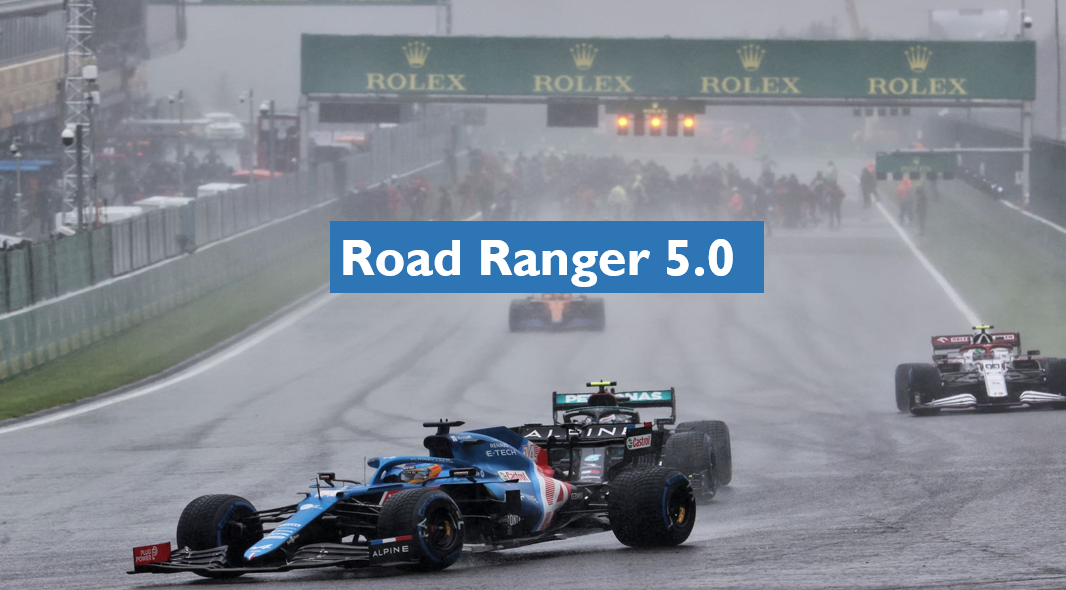

## 1. Introduction

**Formula 1 racing**

The weather has an impact on many sports, but there are very few sports where the stakes are as high as they are in Formula One. This year saw the release of 'Senna' - a documentary about the life and career of the man many considered to have been the greatest racing driver of all time. Ayrton Senna was killed in a race at the San Marino Grand Prix in 1994, proof that even extraordinary amounts of talent can't make you immune to the dangers of high speed driving. F1 cannot afford to back out easily when there is rain and over the last 18 months they have proven that they can adapt to situations. It's now time to show that classic wet races can still happen, meaning a repeat of the controversial events at the 2021 Belgian GP can be avoided in the future. Formula 1 is working to ensure more racing in wet weather can take place. It has become a major issue after the Belgian GP at Spa, which because of the weather became a farcical safety car-led washout with half points awarded.

**Formula AI Hackathon**

Weather predication is the most challanging and crucial part of the Formula 1 racing so Hackamakers organized this hackathon to solved this issued using AI (Artificaial Intalligent). In this hackathon

**Methodology** 

Tools used to analysis : Oracel Cloud, Python. 

1. Perform exploratory data analysis.
2. Change the timestamp format to more understanding.
3. There are around 47% are duplicates.
4. Dealing with Null values.
5. Model Nueral network is used to predict the weather prediction.

### 1.1 Import and display setup

In [ ]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Display option
warnings.filterwarnings('ignore')
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_columns', 70)

## 2. Data set Loading And Explore Dataset

In [ ]:
df = pd.read_csv('dataset/weather.csv.zip')

In [ ]:
df.head()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,GAMEHOST,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.088,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.167,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.238,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.298,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.353,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


In [ ]:
df.shape

(3572328, 59)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572328 entries, 0 to 3572327
Data columns (total 59 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   M_PACKET_FORMAT                                 int64  
 1   M_GAME_MAJOR_VERSION                            int64  
 2   M_GAME_MINOR_VERSION                            int64  
 3   M_PACKET_VERSION                                int64  
 4   M_PACKET_ID                                     int64  
 5   M_SESSION_UID                                   float64
 6   M_SESSION_TIME                                  float64
 7   M_FRAME_IDENTIFIER                              int64  
 8   M_PLAYER_CAR_INDEX                              int64  
 9   M_SECONDARY_PLAYER_CAR_INDEX                    int64  
 10  M_BRAKING_ASSIST                                int64  
 11  M_SESSION_LINK_IDENTIFIER                       int64  
 12  M_PIT_RELEASE_ASSIST        

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
M_PACKET_FORMAT,3572328.0,2.021000e+03,0.000000e+00,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
M_GAME_MAJOR_VERSION,3572328.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
M_GAME_MINOR_VERSION,3572328.0,1.410704e+01,3.091641e-01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.500000e+01
M_PACKET_VERSION,3572328.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
M_PACKET_ID,3572328.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
M_SESSION_UID,3572328.0,8.239394e+18,5.119260e+18,2.106082e+16,3.591802e+18,7.802116e+18,1.279207e+19,1.826297e+19
M_SESSION_TIME,3572328.0,1.019926e+03,1.682487e+03,4.000000e-03,1.138000e+02,4.319240e+02,1.024212e+03,9.686959e+03
M_FRAME_IDENTIFIER,3572328.0,2.857427e+04,5.428773e+04,0.000000e+00,3.007000e+03,1.174900e+04,2.972400e+04,3.339170e+05
M_PLAYER_CAR_INDEX,3572328.0,9.212292e+00,9.217495e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.900000e+01,1.900000e+01
M_SECONDARY_PLAYER_CAR_INDEX,3572328.0,2.550000e+02,0.000000e+00,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
GAMEHOST,2663112,2,f1digest,2640012


## 3. Data preprocessing

### 3.1 Dealing Missing values

In [ ]:
def missing_percentage_each_col(data):
    """Calculating missing value percent in each columns"""
    missing_percentage = data.isna().sum().sort_values(ascending=False) / len(data) * 100
    return missing_percentage[missing_percentage !=0]

missing_percentage_each_col(df)
    

Unnamed: 58                                       100.000000
M_ZONE_START                                       72.727196
M_ZONE_FLAG                                        72.727196
M_TRACK_TEMPERATURE_CHANGE                         27.272804
M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE          27.272804
M_TIME_OFFSET                                      27.272804
M_WEATHER_FORECAST_SAMPLES_M_WEATHER               27.272804
M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE     27.272804
M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE       27.272804
M_RAIN_PERCENTAGE                                  27.272804
M_AIR_TEMPERATURE_CHANGE                           27.272804
GAMEHOST                                           25.451638
M_NUM_MARSHAL_ZONES                                 0.000028
M_DYNAMIC_RACING_LINE                               0.000028
M_DRSASSIST                                         0.000028
M_NETWORK_GAME                                      0.000028
M_TOTAL_LAPS            

In [ ]:
 # Remove rows with missing target, seprate target from predictors
df.dropna(axis=0, subset=['M_RAIN_PERCENTAGE'], inplace=True)

# Drop unwanted columns
df.drop(['M_ZONE_START', 'M_ZONE_FLAG', 'Unnamed: 58', 'GAMEHOST', 'M_DRSASSIST'], axis=1, inplace=True)

In [ ]:
df.shape

(2598054, 54)

In [ ]:
missing_percentage_each_col(df)

M_NUM_MARSHAL_ZONES      0.000038
M_DYNAMIC_RACING_LINE    0.000038
M_IS_SPECTATING          0.000038
M_STEERING_ASSIST        0.000038
M_TOTAL_LAPS             0.000038
M_NETWORK_GAME           0.000038
dtype: float64

In [ ]:
df.columns

Index(['M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION', 'M_GAME_MINOR_VERSION',
       'M_PACKET_VERSION', 'M_PACKET_ID', 'M_SESSION_UID', 'M_SESSION_TIME',
       'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX',
       'M_SECONDARY_PLAYER_CAR_INDEX', 'M_BRAKING_ASSIST',
       'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST', 'TIMESTAMP',
       'M_PIT_STOP_WINDOW_IDEAL_LAP', 'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH',
       'M_GAME_PAUSED', 'M_FORECAST_ACCURACY', 'M_AIR_TEMPERATURE',
       'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_SLI_PRO_NATIVE_SUPPORT',
       'M_SAFETY_CAR_STATUS', 'M_TRACK_ID', 'M_ERSASSIST', 'M_FORMULA',
       'M_SEASON_LINK_IDENTIFIER', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST',
       'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX',
       'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_WEEKEND_LINK_IDENTIFIER',
       'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_TIME_LEFT',
       'M_SESSION_DURATION', 'M_PIT_STOP_REJOIN_POSITION',
       'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET',
 

In [ ]:
missing_percentage_each_col(df)

M_NUM_MARSHAL_ZONES      0.000038
M_DYNAMIC_RACING_LINE    0.000038
M_IS_SPECTATING          0.000038
M_STEERING_ASSIST        0.000038
M_TOTAL_LAPS             0.000038
M_NETWORK_GAME           0.000038
dtype: float64

In [ ]:
df = df.dropna()

### 3.2 DUPLICATES

In [ ]:
duplicate_value = df.duplicated(keep='first')

df.loc[duplicate_value, :].shape

(1907256, 54)

In [ ]:
# dropping ALL duplicate values
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
df.shape

(690797, 54)

### 3.3 Remove Unwated Columns

In [ ]:
# Find our only identical value in our columns
for col in df:
    
    le = len(df[col].unique())
    if (le==1):
        co = col
        print(co) 

M_PACKET_FORMAT
M_GAME_MAJOR_VERSION
M_PACKET_VERSION
M_PACKET_ID
M_SECONDARY_PLAYER_CAR_INDEX
M_SLI_PRO_NATIVE_SUPPORT
M_SAFETY_CAR_STATUS


In [ ]:
del_col = ['M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION', 'M_PACKET_VERSION', 'M_PACKET_ID', 'M_SECONDARY_PLAYER_CAR_INDEX', 'M_SLI_PRO_NATIVE_SUPPORT', 'M_SAFETY_CAR_STATUS']

In [ ]:
# Drop unwanted columns
df.drop(del_col, axis=1, inplace=True)

In [ ]:
df.columns.shape[0]

47

## 4. Train Test Split, Standard Scaler and Label Encoder

In [ ]:
y = df[['M_WEATHER', 'M_RAIN_PERCENTAGE']]
X = df.drop(['M_WEATHER', 'M_RAIN_PERCENTAGE'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train

,M_GAME_MINOR_VERSION,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_NUM_MARSHAL_ZONES
2321367,14,9.335669e+17,1287.403,25823,19,3,3271241059,1,1.641819e+09,0,35,5408,0,0,28,48,3,1,0,3271241059,1,3,1,255,0,3271241059,1,2872,3600,0,6.0,0.0,0.0,29.0,1.0,24.0,1.0,31,80,0.0,200.0,1.0,0.0,2.0,17.0
2586374,14,9.335669e+17,374.588,7600,19,3,3271241059,1,1.641818e+09,0,35,5408,0,0,28,48,3,1,0,3271241059,1,3,1,255,0,3271241059,1,3113,3600,0,1.0,0.0,0.0,36.0,2.0,29.0,2.0,31,80,0.0,200.0,1.0,0.0,2.0,17.0
2483081,14,9.335669e+17,2638.003,52241,19,3,3271241059,1,1.641821e+09,0,35,5408,0,0,28,48,3,1,0,3271241059,1,3,1,255,0,3271241059,1,2805,3600,0,10.0,10.0,0.0,30.0,2.0,24.0,2.0,31,80,0.0,200.0,1.0,0.0,2.0,17.0
103747,14,6.740665e+18,124.841,2491,19,0,1951222561,1,1.641912e+09,0,29,5408,0,1,24,27,3,1,0,1951222531,1,3,5,255,0,1951222531,1,1057,1080,0,6.0,5.0,1.0,29.0,1.0,24.0,2.0,31,80,0.0,200.0,0.0,0.0,2.0,17.0
350334,14,1.707009e+19,892.214,17486,19,0,3589936465,1,1.642375e+09,0,35,5408,0,1,28,48,3,1,0,3589936465,1,3,1,255,0,3589936465,1,2707,3600,0,10.0,5.0,0.0,31.0,1.0,26.0,2.0,31,80,0.0,200.0,0.0,0.0,2.0,17.0
3434845,14,1.086282e+19,1881.279,64726,1,0,3037248480,0,1.642283e+09,0,33,4650,0,0,25,10,28,0,0,3037248480,0,1,8,255,0,3037248480,0,325,1080,0,10.0,45.0,0.0,32.0,2.0,24.0,2.0,110,80,1.0,200.0,0.0,0.0,0.0,16.0
2947127,14,9.335669e+17,91.105,1841,19,3,3271241059,1,1.641818e+09,0,35,5408,0,0,28,48,3,1,0,3271241059,1,3,1,255,0,3271241059,1,3397,3600,0,2.0,5.0,1.0,29.0,2.0,24.0,2.0,31,80,0.0,200.0,1.0,0.0,2.0,17.0
2313104,14,9.335669e+17,4616.008,92965,19,3,3271241059,1,1.641823e+09,0,34,5408,0,0,27,48,3,1,0,3271241059,1,3,1,255,0,3271241059,1,1639,3600,0,1.0,15.0,1.0,34.0,2.0,27.0,2.0,31,80,0.0,200.0,1.0,0.0,2.0,17.0
2016305,14,1.707009e+19,272.368,5371,19,0,3589936465,1,1.642374e+09,0,35,5408,0,1,28,48,3,1,0,3589936465,1,3,1,255,0,3589936465,1,3327,3600,0,10.0,0.0,0.0,32.0,1.0,26.0,1.0,31,80,0.0,200.0,0.0,0.0,2.0,17.0
3202843,14,1.086282e+19,357.303,11424,1,0,2756721461,0,1.642288e+09,0,33,4650,0,0,25,10,28,0,0,2756721461,0,1,8,255,0,2756721461,0,722,1080,0,10.0,30.0,0.0,33.0,2.0,25.0,2.0,110,80,1.0,200.0,0.0,0.0,0.0,16.0


In [ ]:
# For testing purpose saving sample
test_output = X_train.sample(100, random_state=2)
test_output.to_csv('test_output.csv', index=False)

In [ ]:
def std_norm(data):
  """Standard Scaler on dataset"""
  from sklearn.preprocessing import StandardScaler
    
  scaler = StandardScaler()
  scaler.fit(data)
  StandardScaler()

  data = pd.DataFrame(scaler.transform(data), columns = data.columns)
  
  return data

# Standard Scaler on X_train and X_test
X_train = std_norm(X_train)
X_test = std_norm(X_test)

In [ ]:
# Train test split with two targetd columns
y_train_class, y_test_class, y_train, y_test = y_train['M_WEATHER'], y_test['M_WEATHER'], y_train['M_RAIN_PERCENTAGE'], y_test['M_RAIN_PERCENTAGE']

In [ ]:
def label_encoder(col):
  """Label Encoding """
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  col = le.fit_transform(col)
  return col

# Label encoding y_train_class and y_test_class
y_train_class = label_encoder(y_train_class)
y_test_class = label_encoder(y_test_class)


## 5. Model fitting

In [ ]:
# mlp for combined regression and classification predictions on the abalone dataset
from numpy import unique
from numpy import argmax
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
n_features = X_train.shape[1]
n_class =4

In [ ]:
X_test.shape

(138160, 45)

In [ ]:
y_test_class

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
def train_model():
    """Define model layers and train the model"""
    # Define model layers.
    # input
    visible = Input(shape=(45,))
    hidden1 = Dense(20, activation='relu', kernel_initializer='he_normal')(visible)
    hidden2 = Dense(20, activation='relu', kernel_initializer='he_normal')(hidden1)

    # regression output
    out_reg = Dense(1, activation='linear')(hidden2)

    # classification output
    out_clas = Dense(n_class, activation='softmax')(hidden2)

    # define model
    model = Model(inputs=visible, outputs=[out_reg, out_clas])

    # compile the keras model
    model.compile(loss=['mse','sparse_categorical_crossentropy'], optimizer='adam')

    return model.fit(X_train, [y_train,y_train_class], epochs=5, batch_size=32, verbose=2)

train_model()

Epoch 1/5
17270/17270 - 35s - loss: nan - dense_114_loss: nan - dense_115_loss: nan - 35s/epoch - 2ms/step
Epoch 2/5
17270/17270 - 35s - loss: nan - dense_114_loss: nan - dense_115_loss: nan - 35s/epoch - 2ms/step
Epoch 3/5
17270/17270 - 35s - loss: nan - dense_114_loss: nan - dense_115_loss: nan - 35s/epoch - 2ms/step
Epoch 4/5
17270/17270 - 34s - loss: nan - dense_114_loss: nan - dense_115_loss: nan - 34s/epoch - 2ms/step
Epoch 5/5
17270/17270 - 34s - loss: nan - dense_114_loss: nan - dense_115_loss: nan - 34s/epoch - 2ms/step


In [ ]:
# make predictions on test set
yhat1, yhat2 = model.predict(X_test)

# calculate error for regression model
error = mean_absolute_error(y_test, yhat1)
print('MAE: %.3f' % error)

# evaluate accuracy for classification model
yhat2 = argmax(yhat2, axis=-1).astype('int')
acc = accuracy_score(y_test_class, yhat2)
print('Accuracy: %.3f' % acc)

ValueError: y_true and y_pred have different number of output (2!=1)

## 6. Save Model

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')


In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()


## 7. Prediction (Output)

In [ ]:
test_user_input = pd.read_csv('test_output.csv')

In [ ]:
user_input = test_user_input.sample()
output = model.predict(user_input)


In [ ]:
argmax(output[1]).astype('int')

In [ ]:
output[1]

In [ ]:
user_input

In [ ]:
def output_predict(data):
    df.drop(del_col, axis=1, inplace=True)
    

In [ ]:
def output_predict():
    
    
    for i in time_frame:
        print(i)

In [ ]:
output_predict()

In [ ]:
# def output(data):
#     time_frame = [5, 10, 15, 30, 60]
#     for i in time_frame:
#         data['timeframe'] = i
#         data = std_norm(data)
#         model_predict = model.predict(data)
        
#     return model_predict
        
    
    